In [1]:
ENV["COLUMNS"] = 1000 # show all columns in a jupyter cell
#ENV["LINES"] = 20
using CSV, DataFrames
using Plots

# Input featureCounts results

featureCounts Strandness -s:
0 (unstranded), 1 (stranded) and 2 (reversely stranded).

In [2]:
# -s = 0 (unstranded)
un_df = DataFrame(CSV.File("count_summary_un.txt", header = false))[!, [1, 3]]
# -s = 1 (stranded)
s_df = DataFrame(CSV.File("count_summary_s.txt", header = false))[!, [1, 3]]
# -s = 2 (reversely stranded)
rs_df = DataFrame(CSV.File("count_summary_rs.txt", header = false))[!, [1, 3]]

reads_df = DataFrame(CSV.File("summary_table.txt", header = true))[!, [1, 3, 15]];

In [3]:
df = hcat(reads_df, un_df, s_df, rs_df, makeunique=true)[!, [1, 2, 3, 5, 7, 9]]
rename!(df, [:sample, :reads, :usable_reads, :unstranded, :stranded, :reversely_stranded])
first(df, 5)

,sample,reads,usable_reads,unstranded,stranded,reversely_stranded
,String,Int64,Int64,Int64,Int64,Int64
1,PL064_S1_L001,25724,12658,9804,4294,8316
2,PL065_S2_L001,22913,11170,8687,3046,8152
3,PL066_S3_L001,19156,9566,7463,2468,7070
4,PL067_S4_L001,18624,9423,7297,2815,6547
5,PL068_S5_L001,19175,9697,7427,2867,6895


Note: the 'usable_reads' is the reads after read mapping and deduplication.

# A summary table of reads 

In [4]:
df[!, "stranded_loss(%)"] = round.((df.unstranded .- df.stranded)./df.unstranded * 100, digits=2)
df[!, "reversely_stranded_loss(%)"] = round.((df.unstranded .- df.reversely_stranded)./df.unstranded * 100, digits=2)
first(df, 5)

,sample,reads,usable_reads,unstranded,stranded,reversely_stranded,stranded_loss(%),reversely_stranded_loss(%)
,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,PL064_S1_L001,25724,12658,9804,4294,8316,56.2,15.18
2,PL065_S2_L001,22913,11170,8687,3046,8152,64.94,6.16
3,PL066_S3_L001,19156,9566,7463,2468,7070,66.93,5.27
4,PL067_S4_L001,18624,9423,7297,2815,6547,61.42,10.28
5,PL068_S5_L001,19175,9697,7427,2867,6895,61.4,7.16


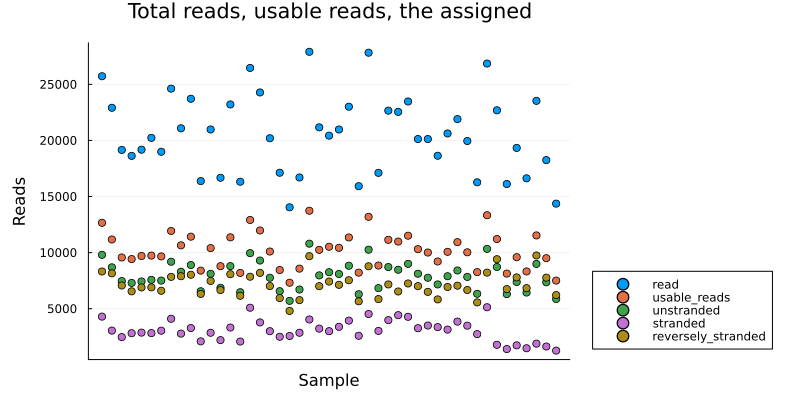

In [9]:
plot(df.sample, [df.reads, df.usable_reads, df.unstranded, df.stranded, df.reversely_stranded], 
    seriestype = :scatter, 
    yformatter = :plain,
    title ="Total reads, usable reads, the assigned",
    label = ["read" "usable_reads" "unstranded" "stranded" "reversely_stranded"],
    legend = :outerbottomright,
    size = (800, 400),
    xaxis = nothing,
    xlabel ="Sample", ylabel = "Reads",
    margin=5Plots.mm
)

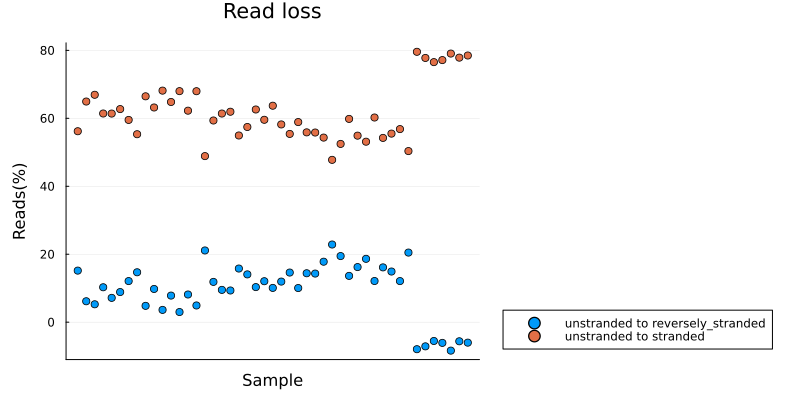

In [6]:
plot(df.sample, [df[!, 8], df[!, 7]], 
    seriestype = :scatter, 
    yformatter = :plain,
    title="Read loss",
    label = ["unstranded to reversely_stranded" "unstranded to stranded"],
    legend = :outerbottomright,
    size = (800, 400),
    xaxis = nothing,
    xlabel ="Sample", ylabel = "Reads(%)",
    margin=5Plots.mm
)